<a href="https://colab.research.google.com/github/ginni0002/Cats-v-s-Dogs-Classifier/blob/main/Cats_v_s_Dogs_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cats classifier(cat or no cat)


In [ ]:
import tensorflow as tf



gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024),
         tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

Virtual devices cannot be modified after being initialized


In [ ]:
!pip install kaggle


In [ ]:

from google.colab import files
files.upload()    

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khushharman","key":"e5b87f1226e1d4b057b6f683bf176dee"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json    

In [ ]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

 99% 805M/817M [00:04<00:00, 170MB/s]
100% 817M/817M [00:04<00:00, 178MB/s]


In [ ]:
!ls ./*

./dogs-vs-cats.zip  ./kaggle.json

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip','r')
zip_ref.extractall('dogs-vs-cats')
zip_ref.close()


this is just some random stuff below


In [ ]:
import os
# print(len([name for name in os.listdir("./dogs-vs-cats/train/train/")]))
# l1=[]
# !ls ./dogs-vs-cats/train/train/cat.0.jpg | cut -b 28-30 | grep "***"



import subprocess
proc=subprocess.Popen('ls ./dogs-vs-cats/train/train/cat.0.jpg | cut -b 28-30 | grep "***" ', shell=True, stdout=subprocess.PIPE, )
output=proc.communicate()[0]
print(output[0:3])


b'cat'


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import glob
from PIL import Image

In [ ]:

classes = ["dog" , "cat"]
train_paths = []
train_labels=[]
test_paths=[]
test_labels=[]

train_path = "./dogs-vs-cats/train/train"
test_path = "./dogs-vs-cats/test/test"



for file in glob.iglob(train_path+"/*.jpg"):
      train_paths.append(file)
      if str(file)[27:30] == "cat":
        train_labels.append(0)
      else:
        train_labels.append(1)
      

random.seed(100)
random.shuffle(train_paths)
random.seed(100)
random.shuffle(train_labels)
test_paths = train_paths[round(len(train_paths)*0.9):]
test_labels = train_labels[round(len(train_labels)*0.9):]

print("train_paths :" , train_paths[0:5])
print("train_labels",train_labels[0:5])
print("test_paths",test_paths[0:5])
print("test_labels",test_labels[0:5])

#The labels are matching with the paths so its a good thing ig :)

train_paths : ['./dogs-vs-cats/train/train/cat.5011.jpg', './dogs-vs-cats/train/train/dog.1957.jpg', './dogs-vs-cats/train/train/cat.11732.jpg', './dogs-vs-cats/train/train/dog.9262.jpg', './dogs-vs-cats/train/train/cat.6960.jpg']
train_labels [0, 1, 0, 1, 0]
test_paths ['./dogs-vs-cats/train/train/cat.6907.jpg', './dogs-vs-cats/train/train/dog.8714.jpg', './dogs-vs-cats/train/train/dog.7707.jpg', './dogs-vs-cats/train/train/cat.1171.jpg', './dogs-vs-cats/train/train/dog.7782.jpg']
test_labels [0, 1, 1, 0, 1]


## Data Generator

In [ ]:
def data_gen(batch_size , train_paths , train_labels):
    
    i = 0
    while True:

        train_batch = []
        labels_batch = []
        path = ""
        for ch in range(batch_size):
            path = train_paths[i]
            image = Image.open(path)

            image = image.resize((256,256))
            
            image = np.array(image)
            image = image/255.0
            

            train_batch.append(image)

            labels_batch.append([train_labels[i]])


            i+=1

            if i == len(train_paths)-1:
                i = 0
            

        train_batch = np.array(train_batch)
        labels_batch = np.array(labels_batch)
        yield (train_batch , labels_batch)
        #return (train_batch , labels_batch)



In [ ]:
(train_images , labels) = data_gen(32 , train_paths , train_labels)
plt.imshow(train_images[0])
print(labels[0])
plt.show()

ValueError: ignored

### Creating a Model

In [ ]:
def Create_Model(width = 256 , height = 256 , depth = 3 , batch_size = 32):

    my_inputs = layers.Input(shape = (width , height , depth))
    x = layers.Conv2D(32 , strides = (1,1) , padding = "same" , kernel_size = (5,5), kernel_initializer = "he_uniform" )(my_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(128 , strides = (1,1) , padding = "same" , kernel_size = (3,3) , kernel_initializer = "he_uniform")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(256 , strides = (1,1) , padding = "same" , kernel_size = (3,3) , kernel_initializer = "he_uniform")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(512 , strides = (1,1) , padding = "same" , kernel_size = (3,3) , kernel_initializer = "he_uniform")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    x = layers.Conv2D(1024 , strides = (1,1) , padding = "same" , kernel_size = (3,3) , kernel_initializer = "he_uniform")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2,2))(x)

    
    x = layers.Flatten()(x)

    x = layers.Dense(512 , kernel_initializer = "he_uniform")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)


    x = layers.Dense(1 , kernel_initializer = "glorot_uniform")(x)
    x = layers.BatchNormalization()(x)
    my_outputs = layers.Activation("sigmoid")(x)

    my_model = keras.Model(inputs = my_inputs , outputs = my_outputs)


    return my_model

    


In [ ]:
model = Create_Model(256 , 256 , 3 , 32)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     36992     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512   

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.1, beta_1 = 0.9 , beta_2 = 0.999 , epsilon = 5e-07 , name = "Adam")

In [ ]:
model.compile(optimizer = optimizer , loss = "binary_crossentropy" , metrics = ['accuracy']   )

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 576541774111889268, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 755377223886173440
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
batch_size = 32
epochs = 30
train_steps = 700
test_steps = 80   


train_gen = data_gen(batch_size , train_paths , train_labels)
test_gen = data_gen(batch_size , test_paths , test_labels)

model.fit(x = train_gen , 
          batch_size = batch_size ,
          epochs = epochs ,
          verbose = 1,
          validation_data = test_gen, 
          steps_per_epoch = train_steps,
          validation_steps=test_steps,
          validation_batch_size = batch_size)


Epoch 1/30
700/700 [==============================] - 215s 258ms/step - loss: 0.5512 - accuracy: 0.7091 - val_loss: 0.6545 - val_accuracy: 0.6871
Epoch 2/30
700/700 [==============================] - 180s 257ms/step - loss: 0.4209 - accuracy: 0.8064 - val_loss: 0.6732 - val_accuracy: 0.6406
Epoch 3/30
700/700 [==============================] - 180s 258ms/step - loss: 0.3244 - accuracy: 0.8579 - val_loss: 0.6682 - val_accuracy: 0.6898
Epoch 4/30
700/700 [==============================] - 180s 258ms/step - loss: 0.2420 - accuracy: 0.8960 - val_loss: 0.4198 - val_accuracy: 0.8141
Epoch 5/30
700/700 [==============================] - 181s 259ms/step - loss: 0.1816 - accuracy: 0.9271 - val_loss: 0.7700 - val_accuracy: 0.7258
Epoch 6/30
700/700 [==============================] - 182s 259ms/step - loss: 0.1473 - accuracy: 0.9426 - val_loss: 1.4048 - val_accuracy: 0.6816
Epoch 7/30
700/700 [==============================] - 182s 261ms/step - loss: 0.1162 - accuracy: 0.9533 - val_loss: 1.6305 -

# Saving the model

In [ ]:
!mkdir -p saved_model
model.save("saved_model/model")
!zip -r saved_model/zip_folder.zip saved_model/model/"Untitled Folder"
from google.colab import files


INFO:tensorflow:Assets written to: saved_model/model/assets
	zip warning: name not matched: saved_model/model/Untitled Folder

zip error: Nothing to do! (try: zip -r saved_model/zip_folder.zip . -i saved_model/model/Untitled Folder)


In [ ]:
!zip -r saved_model/zip_assets.zip saved_model/model/assets
files.download("saved_model/zip_assets.zip")

updating: saved_model/model/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r zip_variables_1.zip saved_model/model/variables/variables.data-00000-of-00001
files.download("zip_variables_1.zip")


  adding: saved_model/model/variables/variables.data-00000-of-00001 (deflated 36%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
model.save("/content/gdrive/My Drive/Cats vs Dogs model")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Cats vs Dogs model/assets


# making predictions using our model 

before running the predictions , we have to import the required modules and the right paths

In [1]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json    

!kaggle datasets download -d biaiscience/dogs-vs-cats

import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip','r')
zip_ref.extractall('dogs-vs-cats')
zip_ref.close()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import glob
from PIL import Image


Saving kaggle.json to kaggle.json
 98% 801M/817M [00:09<00:00, 106MB/s] 
100% 817M/817M [00:09<00:00, 92.6MB/s]


Mounted at /content/gdrive
dogs-vs-cats/test/test/8504.jpg


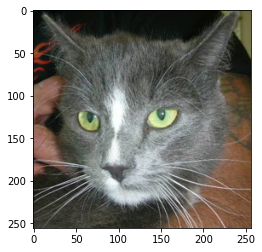

[[1.1890592e-19]]


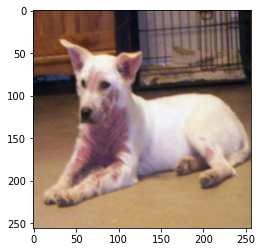

[[0.99667263]]


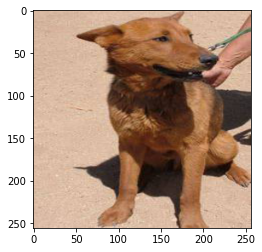

[[0.9999721]]


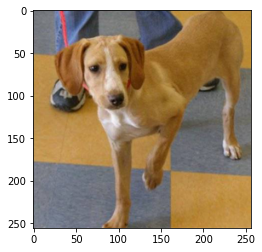

[[1.]]


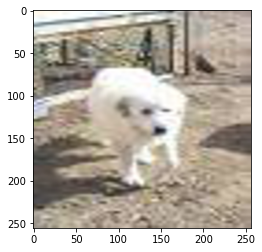

[[0.9999747]]


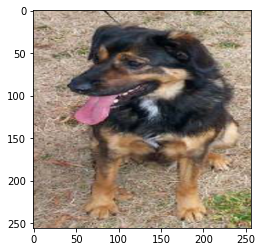

[[1.]]


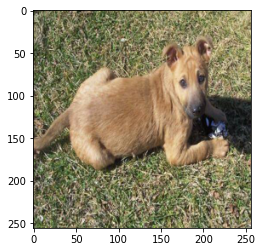

[[0.9999999]]


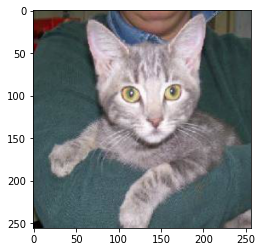

[[5.6642532e-18]]


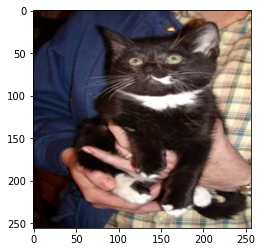

[[0.00385236]]


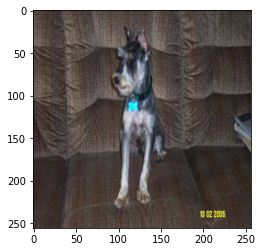

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
model = tf.keras.models.load_model("/content/gdrive/My Drive/Cats vs Dogs model")
val_paths=[]  
val_path ="dogs-vs-cats/test/test"

for file in glob.iglob(val_path+"/*.jpg"):
        val_paths.append(file)
print(val_paths[19])


def val_data_gen(val_paths):
        i=0
        list1=[]
        for path in val_paths[:30]:
            img = Image.open(path)
            img = img.resize((256,256))
            plt.imshow(img)
            plt.show()

            img = np.array(img)
            img = img/255.0
            img = np.expand_dims(img , axis = 0)
            predictions = model.predict(img)
            print(predictions)
            #predictions = round(predictions[0][0])
            list1.append(predictions)
            i+=1
            if i == len(val_paths)-1:
              i=0
        list1 = np.array(list1)
        return list1

list2=val_data_gen(val_paths)
#print(list2)



# print(list2[0][0][0])
# round_pred =[]
# for ch in list2:
 #  round_pred.append(round(ch[0][0]))

# print(round_pred)

#predictions = model.predict_generator(val_data_gen(val_paths),len(val_paths)//38)
# val_pred = [round(ch[0]) for ch in predictions]
# print(val_pred)
# img = Image.open(val_paths[0])



# for file in glob.iglob(val_path+"/*.jpg"):
#        val_paths.append(file)
#  print(val_paths[19])
#  list1=[]
#  def val_data_gen(val_paths):
#      i=0
#      for ch in val_paths:
#        img = Image.open(ch)
#        img = img.resize((256,256))
#        img = np.array(img)
#        list1.append(img)
#      return list1
#  predictions = model.predict(val_data_gen(val_paths))
#  list1 = []
#  for ch in predictions:
#    if round(predictions) == 0:
#        list2.append("cat")
#    else:
#        list2.append("dog")